In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [25]:
from pathlib import Path
csvpath = Path('./Resources/GGHC_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.tail()

,Market Return,Portfolio Return
Date,,
2020-08-17,1.245916,1.312923
2020-08-18,1.248645,1.316739
2020-08-19,1.243482,1.312691
2020-08-20,1.247281,1.317734
2020-08-21,1.251669,1.322819


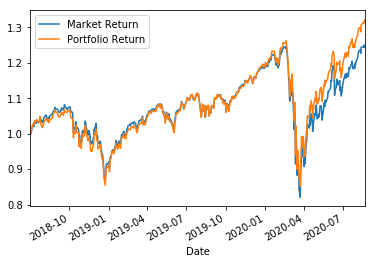

In [4]:
df.plot()

In [5]:
portfolio = df["Portfolio Return"].to_frame().dropna()
portfolio.head(2)

,Portfolio Return
Date,
2018-07-02,1.004940
2018-07-03,0.998465


In [6]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portfolio,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2929.524, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2890.673, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2926.896, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2917.372, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2891.969, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2930.861, Time=0.73 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2934.047, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2935.511, Time=0.48 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2939.663, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2940.246, Time=0.55 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2946.253, Time=0.56 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2965.833, Time=0.95 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-2981.650, Time=2.10 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2975.884, Time=1.85 sec
 ARIMA(7,1,2)(0,0,0

In [7]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1500.328
Date:                Tue, 25 Aug 2020   AIC                          -2982.656
Time:                        14:27:08   BIC                          -2944.082
Sample:                             0   HQIC                         -2967.566
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7621      0.075    -10.136      0.000      -0.910      -0.615
ar.L2          0.0276      0.035      0.794      0.427      -0.040       0.096
ar.L3          0.1552      0.033      4.716      0.000       0.091       0.220
ar.L4         -0.0575      0.035     -1.657      0.097      -0.126       0.011
ar.L5         -0.0375      0.041     -0.917      0.359      -0.118       0.043
ar.L6         -0.0401      0.038     -1.043      0.297      -0.115       0.035
ar.L7          0.1501      0.037      4.077      0.000       0.078       0.222
ma.L1          0.6280      0.073      8.638      0.000       0.485       0.770
sigma2         0.0002   6.95e-06     31.430      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.55   Jarque-Bera (JB):              1096.04
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.58   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## SARIMAX Model

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [9]:
# Create a SARIMAX model
model = SARIMAX(portfolio, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [10]:
# Fit the model to the data
results = model.fit()

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       Portfolio Return   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1500.328
Date:                Tue, 25 Aug 2020   AIC                          -2982.656
Time:                        14:27:32   BIC                          -2944.082
Sample:                             0   HQIC                         -2967.566
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7621      0.075    -10.136      0.000      -0.910      -0.615
ar.L2          0.0276      0.035      0.794      0.427      -0.040       0.096
ar.L3          0.1552      0.033      4.716      0.000       0.091       0.220
ar.L4         -0.0575      0.035     -1.657      0.097      -0.126       0.011
ar.L5         -0.0375      0.041     -0.917      0.359      -0.118       0.043
ar.L6         -0.0401      0.038     -1.043      0.297      -0.115       0.035
ar.L7          0.1501      0.037      4.077      0.000       0.078       0.222
ma.L1          0.6280      0.073      8.638      0.000       0.485       0.770
sigma2         0.0002   6.95e-06     31.430      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.55   Jarque-Bera (JB):              1096.04
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               3.58   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
results.forecast(steps=30)

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


538    1.318042
539    1.325347
540    1.321044
541    1.324037
542    1.322046
543    1.323289
544    1.323680
545    1.322086
546    1.324776
547    1.321980
548    1.324398
549    1.322624
550    1.323684
551    1.323385
552    1.322986
553    1.323974
554    1.322652
555    1.324036
556    1.322824
557    1.323710
558    1.323226
559    1.323301
560    1.323587
561    1.323037
562    1.323727
563    1.323027
564    1.323627
565    1.323203
566    1.323415
567    1.323414
dtype: float64

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


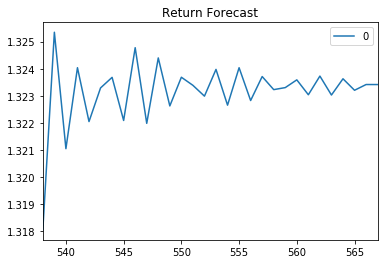

In [13]:
# create a dataframe that holds the forecast values.
return_forecast = pd.DataFrame(results.forecast(steps=30))
# Visualize the forecast
return_forecast.plot(title="Return Forecast")

## Forecast Market Return

In [14]:
market = df["Market Return"].to_frame().dropna()
market.head(2)

,Market Return
Date,
2018-07-02,1.002766
2018-07-03,0.998673


In [15]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(market,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2946.308, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2907.627, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2942.425, Time=0.31 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2932.675, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2909.181, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2951.490, Time=0.87 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2952.185, Time=0.36 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2953.594, Time=0.51 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2960.419, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2960.733, Time=0.57 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2965.183, Time=0.61 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-2989.695, Time=1.02 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-2999.727, Time=2.07 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-2989.848, Time=1.79 sec
 ARIMA(7,1,2)(0,0,0

In [16]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1510.359
Date:                Tue, 25 Aug 2020   AIC                          -3002.719
Time:                        14:28:24   BIC                          -2964.145
Sample:                             0   HQIC                         -2987.629
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7080      0.081     -8.757      0.000      -0.866      -0.550
ar.L2          0.0545      0.032      1.685      0.092      -0.009       0.118
ar.L3          0.1549      0.031      4.936      0.000       0.093       0.216
ar.L4         -0.0785      0.031     -2.500      0.012      -0.140      -0.017
ar.L5         -0.0439      0.038     -1.152      0.249      -0.119       0.031
ar.L6         -0.0409      0.035     -1.160      0.246      -0.110       0.028
ar.L7          0.1657      0.034      4.824      0.000       0.098       0.233
ma.L1          0.5695      0.082      6.913      0.000       0.408       0.731
sigma2         0.0002   6.45e-06     32.684      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.98   Jarque-Bera (JB):              1438.93
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Create an SARIMAX model
model_1 = SARIMAX(market, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [18]:
# Fit the model to the data
results_1 = model_1.fit()

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
# Print the model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Market Return   No. Observations:                  538
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1510.359
Date:                Tue, 25 Aug 2020   AIC                          -3002.719
Time:                        14:28:27   BIC                          -2964.145
Sample:                             0   HQIC                         -2987.629
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7080      0.081     -8.757      0.000      -0.866      -0.550
ar.L2          0.0545      0.032      1.685      0.092      -0.009       0.118
ar.L3          0.1549      0.031      4.936      0.000       0.093       0.216
ar.L4         -0.0785      0.031     -2.500      0.012      -0.140      -0.017
ar.L5         -0.0439      0.038     -1.152      0.249      -0.119       0.031
ar.L6         -0.0409      0.035     -1.160      0.246      -0.110       0.028
ar.L7          0.1657      0.034      4.824      0.000       0.098       0.233
ma.L1          0.5695      0.082      6.913      0.000       0.408       0.731
sigma2         0.0002   6.45e-06     32.684      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       34.98   Jarque-Bera (JB):              1438.93
Prob(Q):                              0.70   Prob(JB):                         0.00
Heteroskedasticity (H):               4.10   Skew:                            -1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


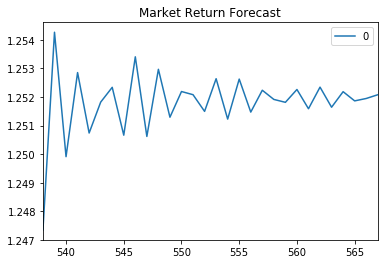

In [20]:
# create a dataframe that holds the forecast values.
market_return_forecast = pd.DataFrame(results_1.forecast(steps=30))

# Visualize the forecast
market_return_forecast.plot(title="Market Return Forecast")

In [30]:
# concatenate the dataframes
forecast_df = pd.concat([market_return_forecast, return_forecast], axis=1)
forecast_df.columns = [ "Market Return Forecast", "Portfolio Return Forecast"]
forecast_df.index = pd.bdate_range(start='8/24/2020', periods = 30)
forecast_df.tail()

,Market Return Forecast,Portfolio Return Forecast
2020-09-28,1.251641,1.323027
2020-09-29,1.252185,1.323627
2020-09-30,1.251863,1.323203
2020-10-01,1.251947,1.323415
2020-10-02,1.252078,1.323414


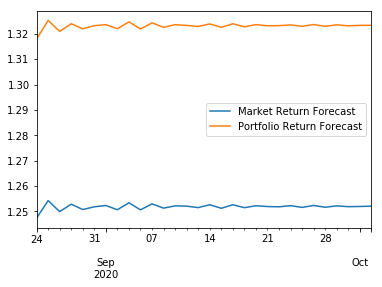

In [31]:
forecast_df.plot()

In [ ]:
final_df = pd.concat([df, forecast_df], axis=0, sort=False)

<Figure size 432x288 with 0 Axes>

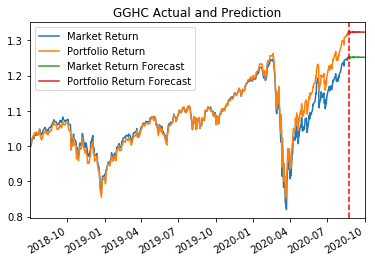

In [41]:
plt.figure();
final_df.plot()
plt.title('GGHC Actual and Prediction')
plt.axvline(forecast_df.index[0], color='r', linestyle='--')